# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     803.3
Date:                Thu, 27 Mar 2025   Prob (F-statistic):           1.01e-39
Time:                        11:34:16   Log-Likelihood:                -3.3959
No. Observations:                  50   AIC:                             14.79
Df Residuals:                      46   BIC:                             22.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9548      0.092     53.840      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.45083753  4.94521547  5.39860622  5.78236972  6.07820196  6.28114227
  6.40038836  6.45778514  6.48423566  6.51462385  6.58208319  6.71255293
  6.92051641  7.20662141  7.55757382  7.94832171  8.34617139  8.71615885
  9.02679422  9.25523553  9.39104152  9.43788716  9.41295982  9.34413546
  9.26539868  9.21125916  9.21108177  9.28426208  9.43703967  9.66147299
  9.93674414 10.2325792  10.51422215 10.74814516 10.90755716 10.97680549
 10.95394763 10.85107031 10.69230375 10.50985706 10.33872644 10.21094536
 10.1503216  10.16852562 10.26317322 10.41821721 10.60658394 10.79462138
 10.94762813 11.03555469]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.02564016 10.87739028 10.61141374 10.27467508  9.92899621  9.63592018
  9.44164333  9.36570481  9.39620272  9.49270809]


## Plot comparison

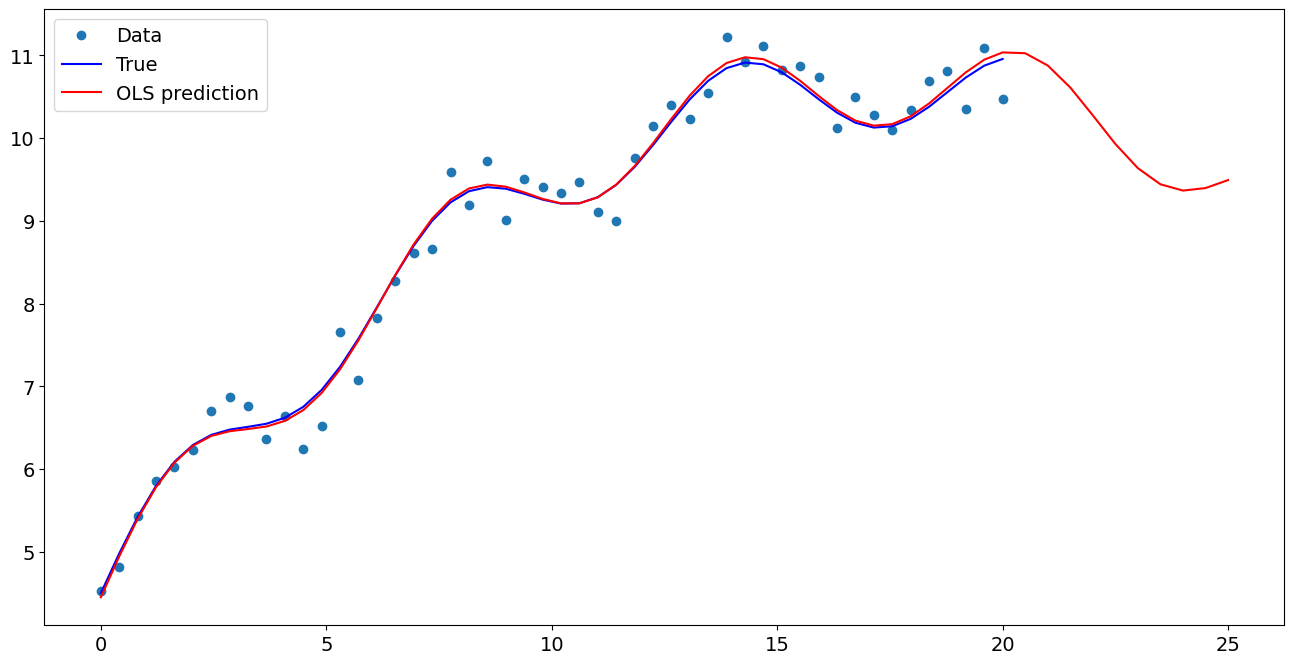

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.954791
x1                  0.506829
np.sin(x1)          0.525514
I((x1 - 5) ** 2)   -0.020158
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.025640
1    10.877390
2    10.611414
3    10.274675
4     9.928996
5     9.635920
6     9.441643
7     9.365705
8     9.396203
9     9.492708
dtype: float64